In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('water_potability.csv')

In [ ]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
df.shape

(3276, 10)

In [ ]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [ ]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [ ]:
df.describe(include = "all")

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
x = df[(df['Potability']==0) & (df['Hardness']<=150)][['ph']].mean()
x

ph    6.721973
dtype: float64

In [ ]:
y = df[(df['Potability']==0) & (df['Hardness']>150)][['ph']].mean()
y

ph    7.112512
dtype: float64

In [ ]:
z = df[(df['Potability']==1) & (df['Hardness']<=150)][['ph']].mean()
z

ph    7.098154
dtype: float64

In [ ]:
o = df[(df['Potability']==1) & (df['Hardness']>150)][['ph']].mean()
o

ph    7.071429
dtype: float64

In [ ]:
for i in range (0,len(df)):
    if (pd.isnull(df['ph'][i]) == True):
        if ((df['Potability'][i]==0) & (df['Hardness'][i]<=150)):
            df['ph'][i] = x
        elif ((df['Potability'][i]==0) & (df['Hardness'][i]>150)):
            df['ph'][i] = y
        elif ((df['Potability'][i]==1) & (df['Hardness'][i]<=150)):
             df['ph'][i] = z
        else:
             df['ph'][i] = o

In [ ]:
x = df[(df['Potability']==0)][['Sulfate']].mean()
x


Sulfate    334.56429
dtype: float64

In [ ]:
y = df[(df['Potability']==1)][['Sulfate']].mean()
y


Sulfate    332.56699
dtype: float64

In [ ]:
for i in range (0,len(df)):
    if (pd.isnull(df['Sulfate'][i]) == True):
        if (df['Potability'][i]==0):
            df['Sulfate'][i] = x
        else:
             df['Sulfate'][i] = y

In [ ]:
df['Trihalomethanes'].fillna(value = df['Trihalomethanes'].mean() , inplace = True)

In [ ]:
df['ph'] = df['ph'].round(decimals = 1)
df["ph"].head()

0    7.1
1    3.7
2    8.1
3    8.3
4    9.1
Name: ph, dtype: float64

In [ ]:
df["Type of Water"] = ""
for i in range(0,len(df)):
    if (df["ph"][i] > 9):
        df["Type of Water"][i] = "Alkaline_water"
    elif (df["ph"][i] <= 9 and df["ph"][i] > 8):
        df["Type of Water"][i] = "Bottled_waters_labeled_as_alkaline"
    elif (df["ph"][i] <= 8 and df["ph"][i] > 7.5 ):
        df["Type of Water"][i] = "Ocean_water"
    elif(df["ph"][i] == 7.5 ):
        df["Type of Water"][i] = "Tap_water"
    elif(df["ph"][i] < 7.5 and df["ph"][i] >=6.5):
        df["Type of Water"][i] = "Common_bottled_waters"
    elif(df["ph"][i] < 6.5 and df["ph"][i] >=5.5):
        df["Type of Water"][i] = "Distilled_reverse_osmosis_water"
    else:
        df["Type of Water"][i] = "Acidic_water"

In [ ]:
df["Type of Hardness"] = ""
for i in range(0,len(df)):
    if (df["Hardness"][i] >=0  and df["Hardness"][i] < 17.1):
        df["Type of Hardness"][i] = "Soft"
    elif (df["Hardness"][i] >= 17.1 and df["Hardness"][i] < 60):
        df["Type of Hardness"][i] = "Slightly_hard"
    elif (df["Hardness"][i] >= 60 and df["Hardness"][i] < 120 ):
        df["Type of Hardness"][i] = "Moderately_hard"
    elif(df["Hardness"][i] >= 120 and df["Hardness"][i] < 180):
        df["Type of Hardness"][i] = "Hard"
    else:
         df["Type of Hardness"][i] = "Very_Hard"


In [ ]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.1  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.7  129.422921  18630.057858     6.635246  334.564290    592.885359   
2  8.1  224.236259  19909.541732     9.275884  334.564290    418.606213   
3  8.3  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.1  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       10.379783        86.990970   2.963135           0   
1       15.180013        56.329076   4.500656           0   
2       16.868637        66.420093   3.055934           0   
3       18.436524       100.341674   4.628771           0   
4       11.558279        31.997993   4.075075           0   

                        Type of Water Type of Hardness  
0               Common_bottled_waters        Very_Hard  
1                        Acidic_water             Hard  
2  Bottled_waters_labeled_as_alkaline        Very_Hard  
3  Bottled_waters_labeled_as_alkaline        Very_Hard  
4                      Alkaline_water        Very_Hard

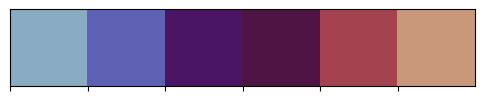

In [ ]:
colors = sb.color_palette('twilight')[0:6]
sb.palplot(colors)

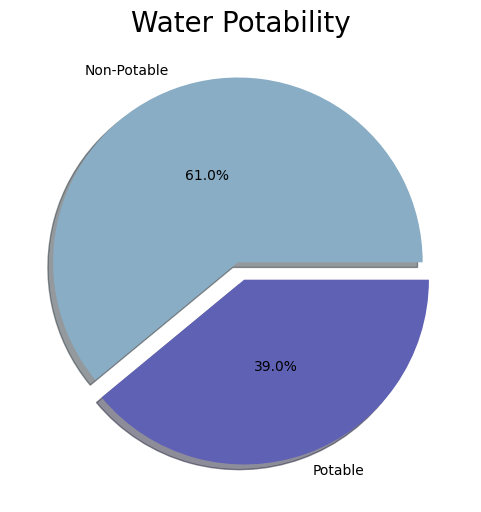

In [ ]:
labels = ['Non-Potable', 'Potable']
data = [df['Potability'].value_counts()[0],
         df['Potability'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True, colors = colors)
plt.title("Water Potability", fontsize=20);
plt.show()



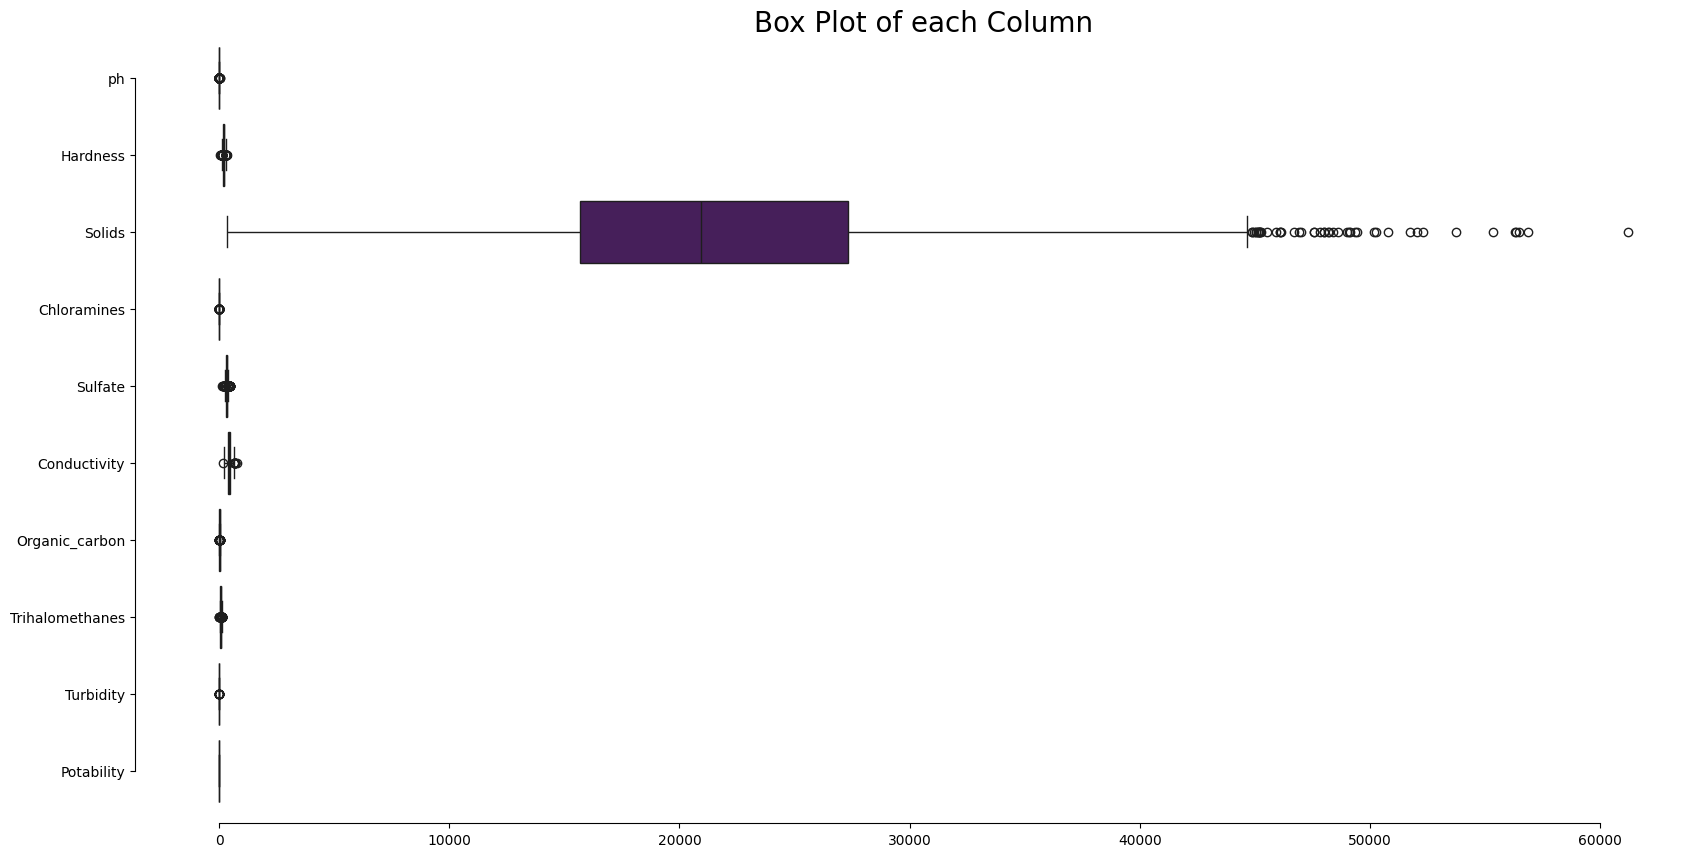

In [ ]:
fig1, ax = plt.subplots(figsize=[20,10])
ax = sb.boxplot(data=df, orient="h",palette = colors)
sb.despine(offset=10, trim=True)
plt.title("Box Plot of each Column", fontsize=20);
plt.show()

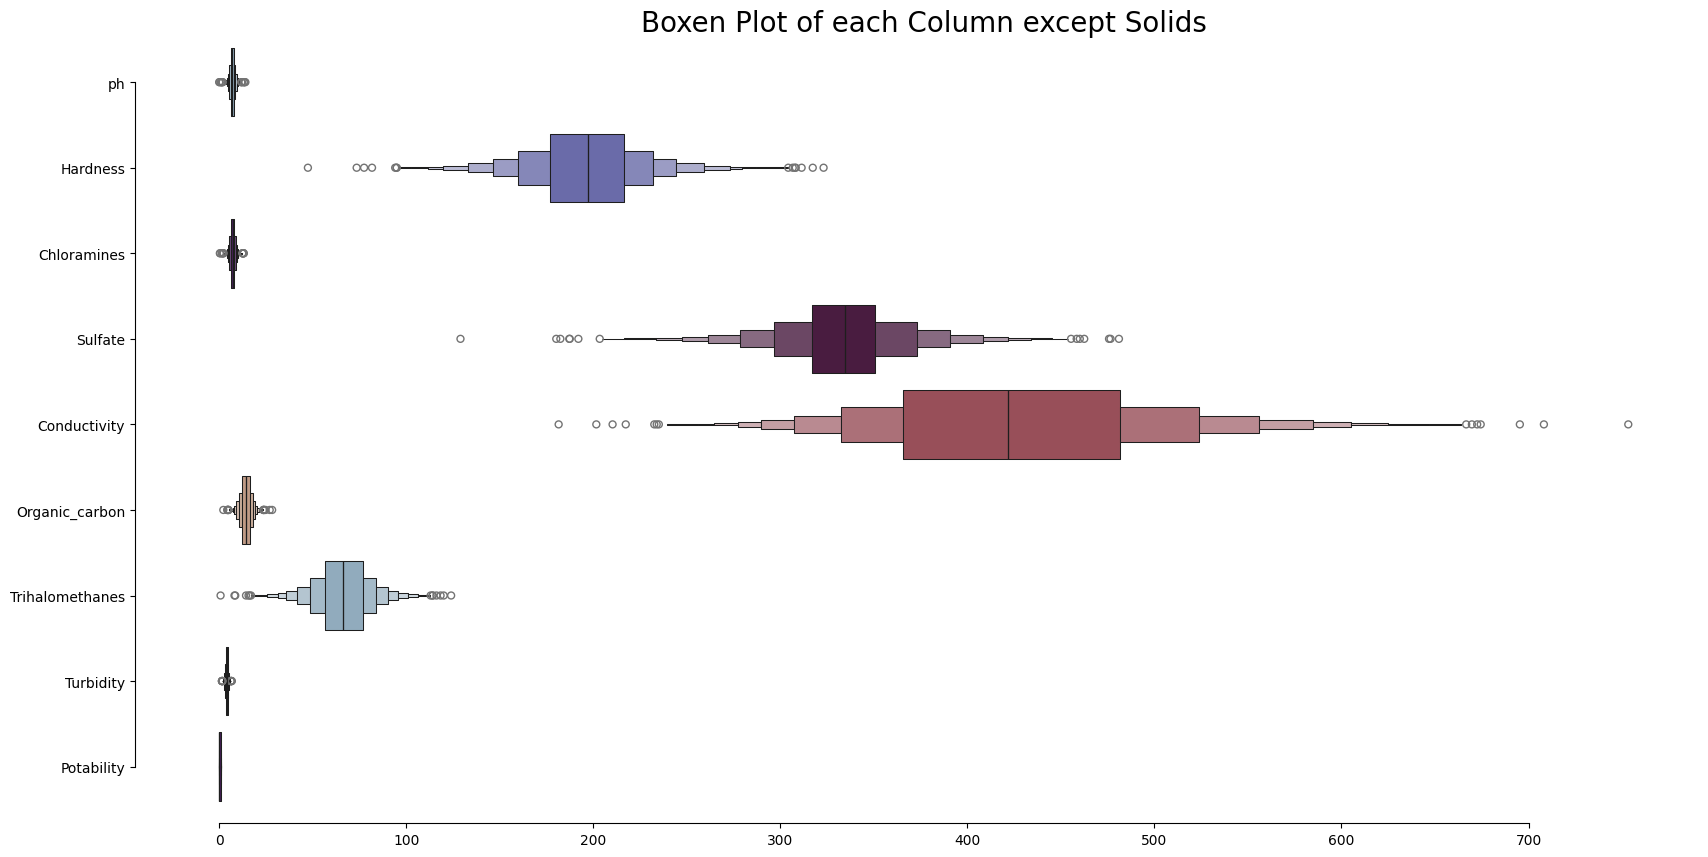

In [ ]:
df1 = pd.DataFrame()
df1 = df
df1 = df1.drop("Solids",axis=1)
fig1, ax = plt.subplots(figsize=[20,10])
ax = sb.boxenplot(data=df1, orient="h", palette=colors)
sb.despine(offset=10, trim=True)
plt.title("Boxen Plot of each Column except Solids", fontsize=20);
plt.show()

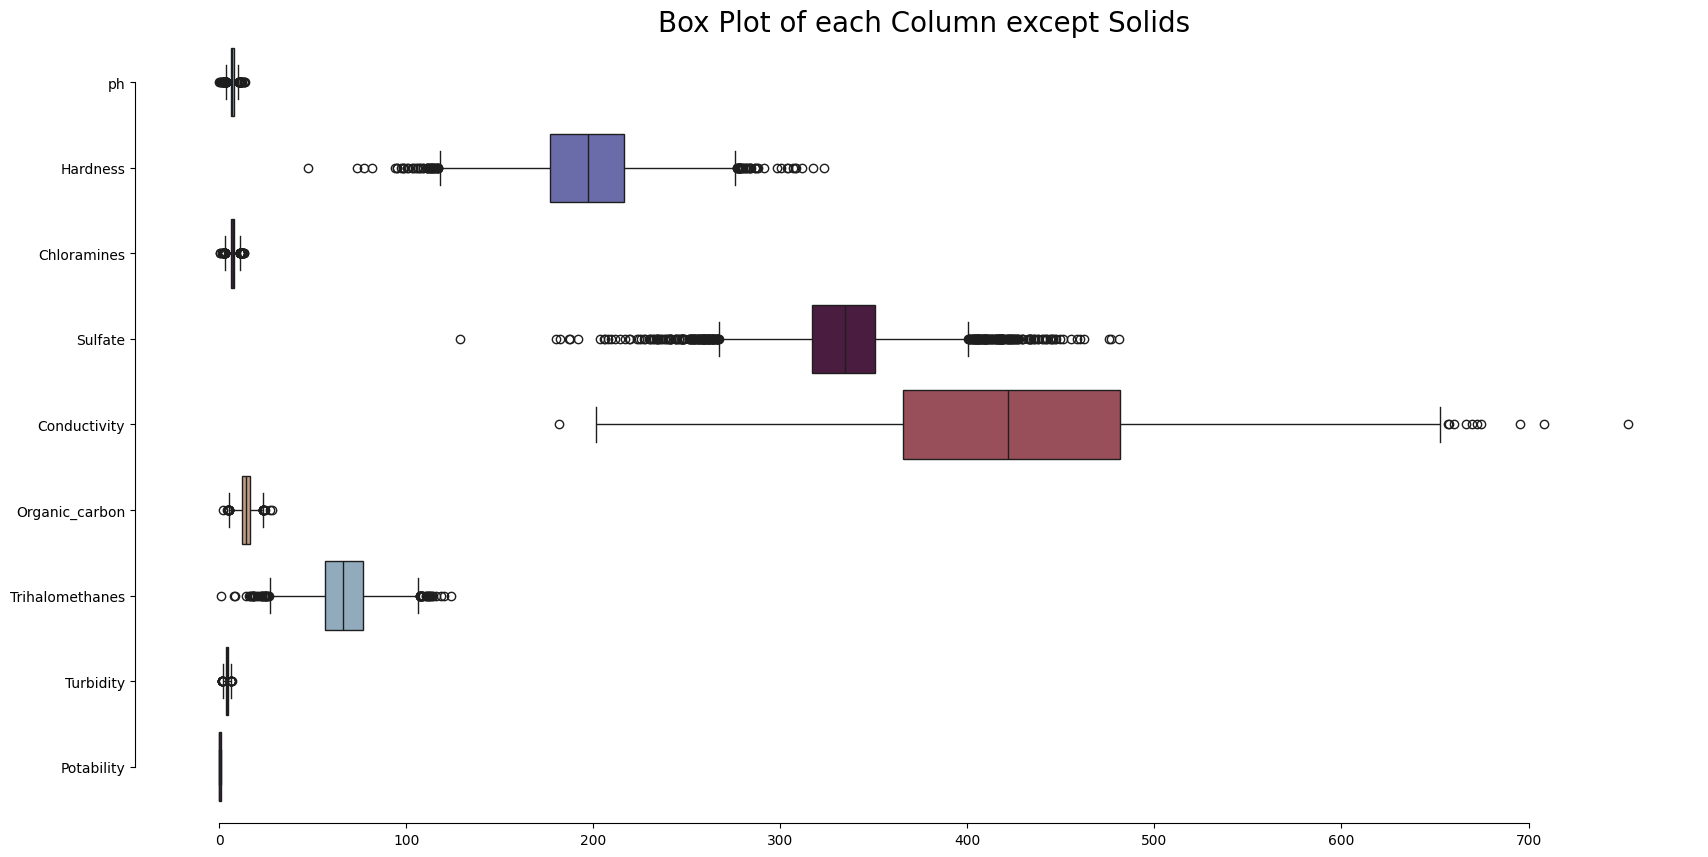

In [ ]:
fig1, ax = plt.subplots(figsize=[20,10])
ax = sb.boxplot(data=df1, orient="h", palette=colors)
sb.despine(offset=10, trim=True)
plt.title("Box Plot of each Column except Solids", fontsize=20);
plt.show()

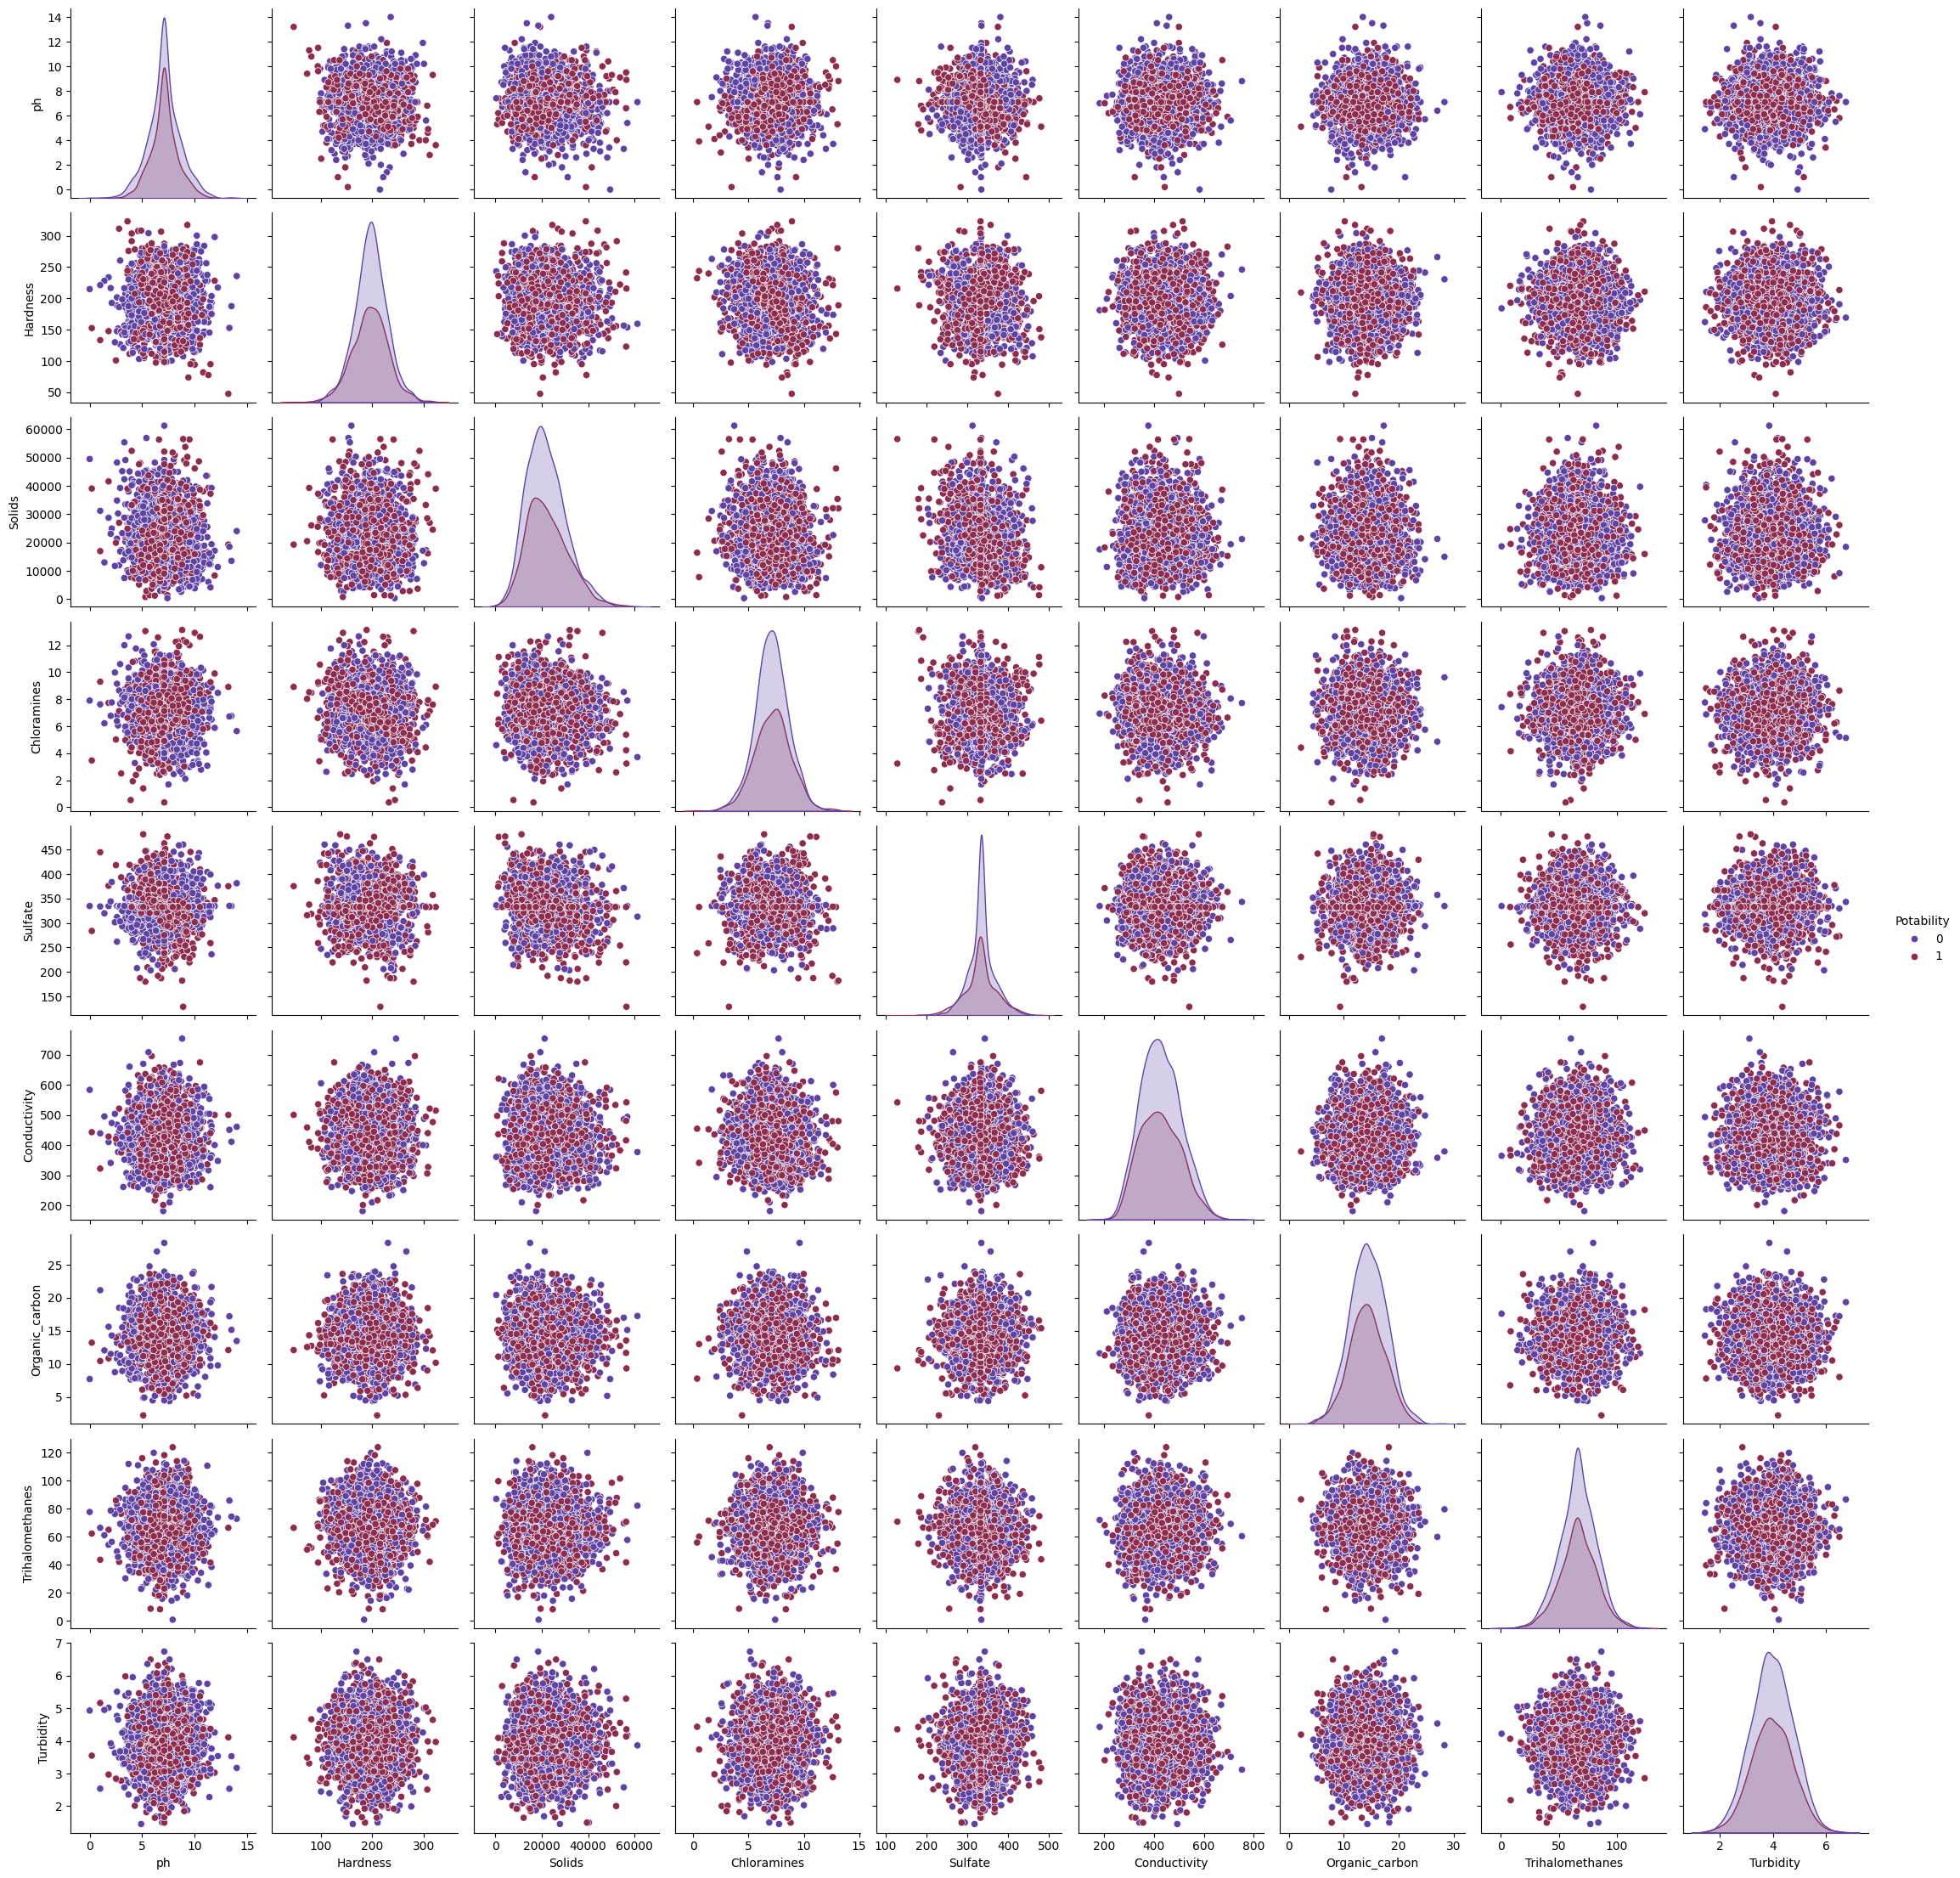

In [ ]:
ax = sb.pairplot(df, hue="Potability",diag_kind="kde",kind="scatter",palette="twilight")
plt.show()

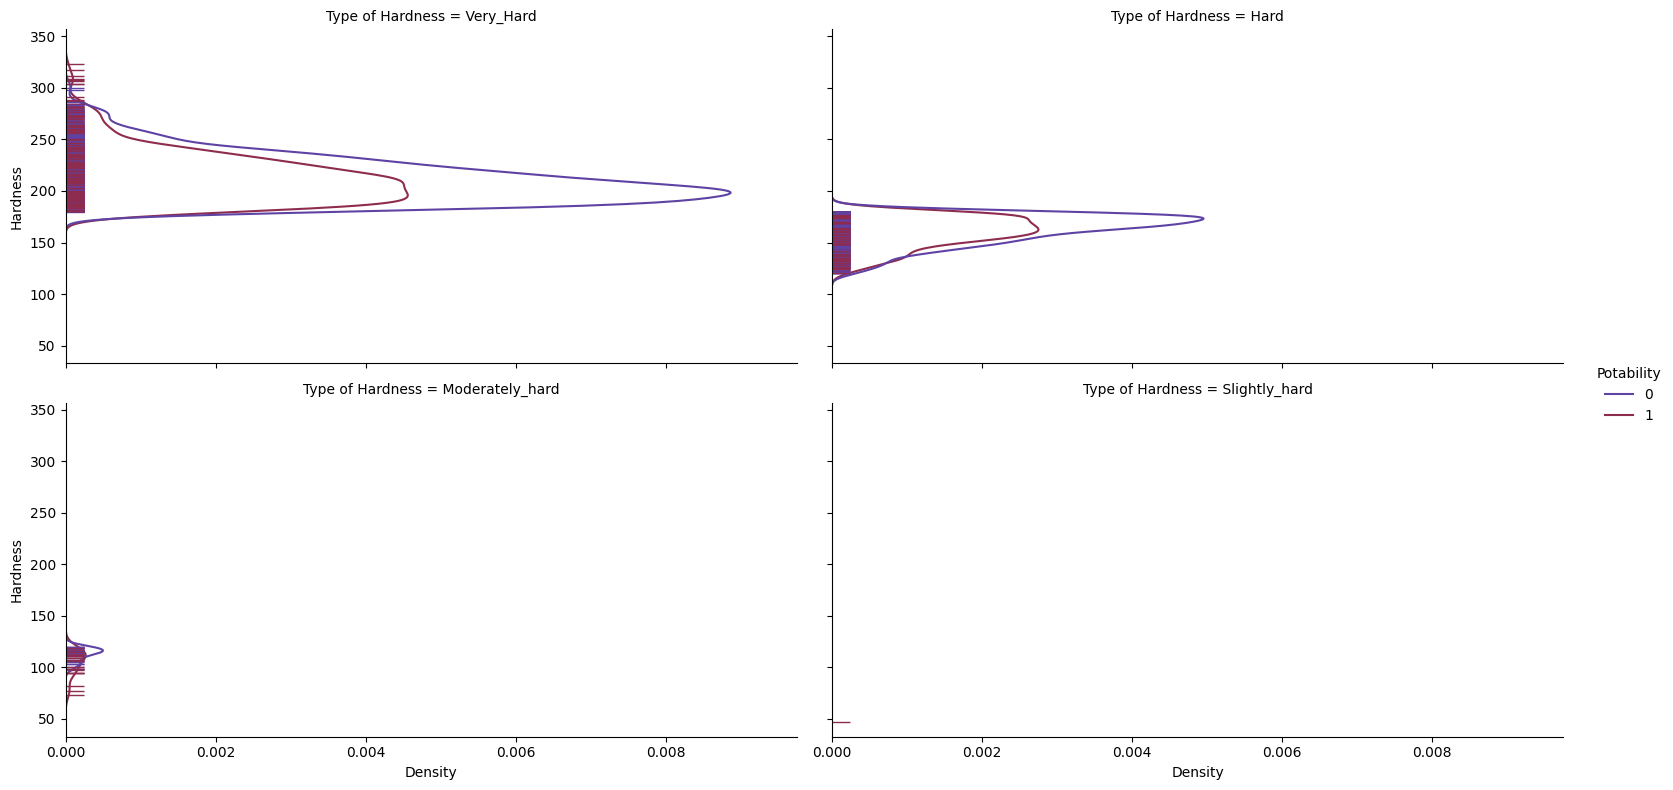

In [ ]:
g = sb.displot(
    data=df, y="Hardness", hue="Potability", col="Type of Hardness", palette = "twilight",col_wrap=2,
    kind="kde", height=4, aspect=2,rug=True)

plt.show()

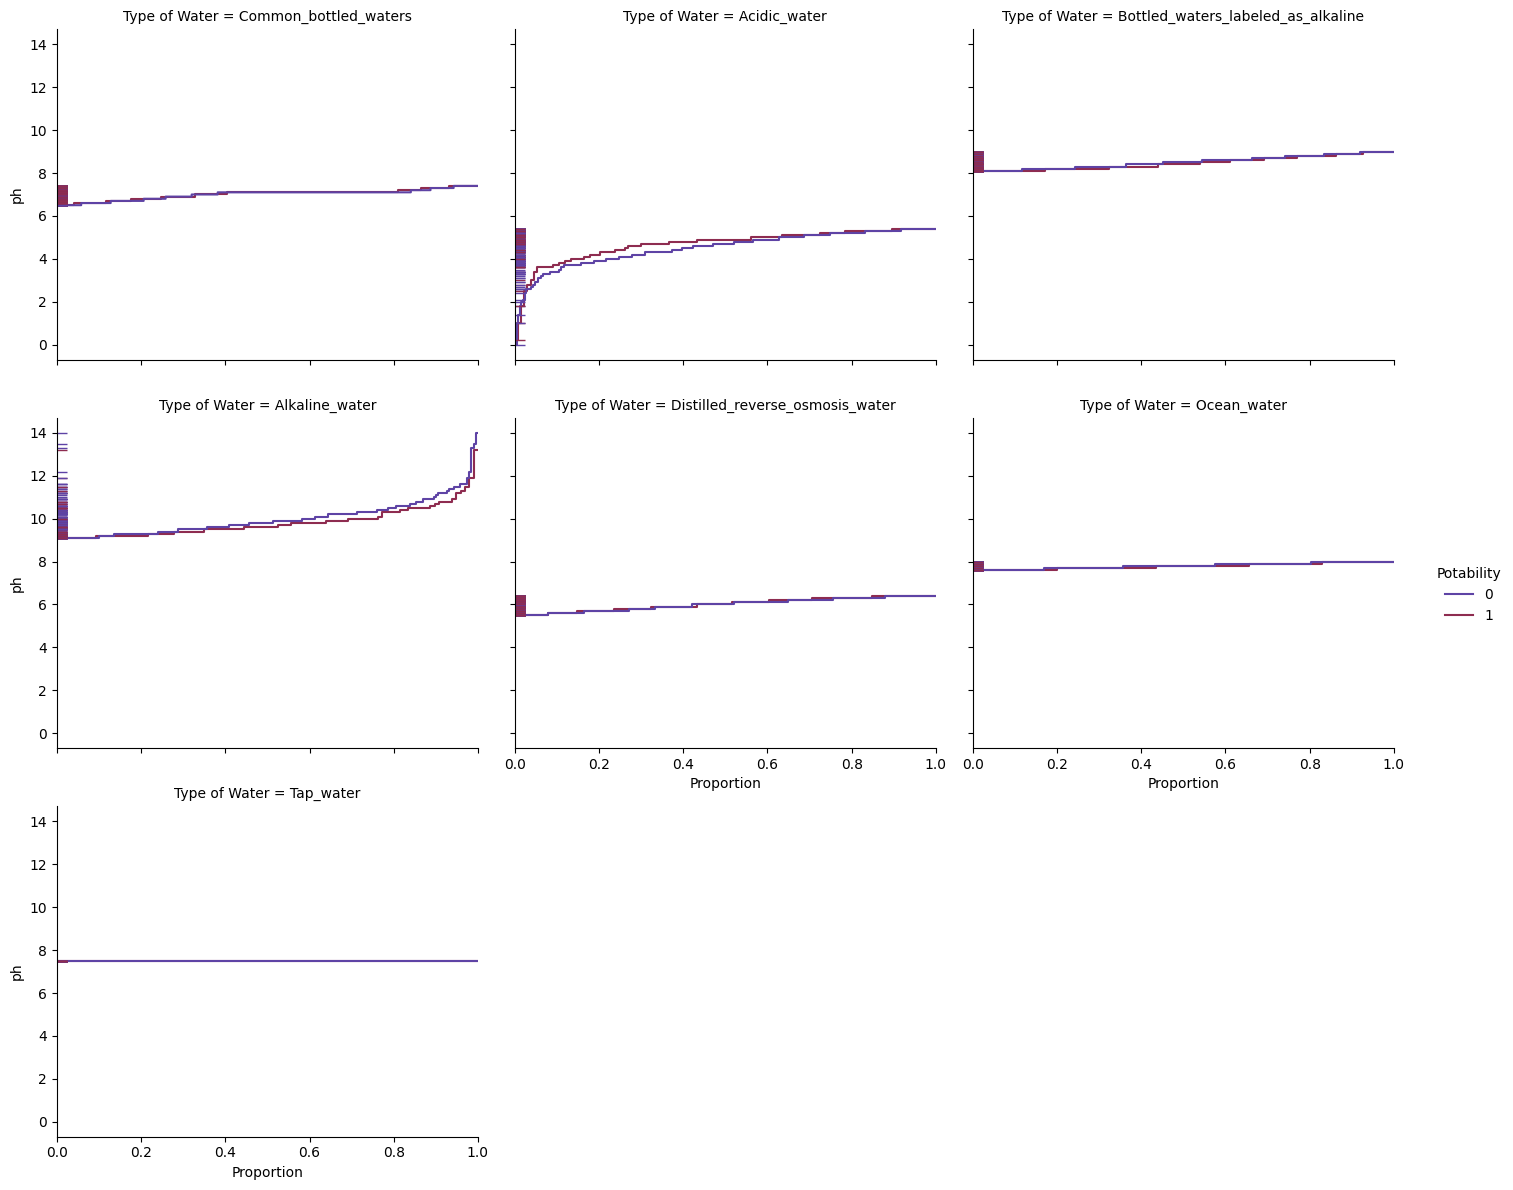

In [ ]:
g = sb.displot(
    data=df, y="ph", hue="Potability", col="Type of Water", palette = "twilight", col_wrap=3,
    kind="ecdf", height=4, aspect=1.2,rug=True)

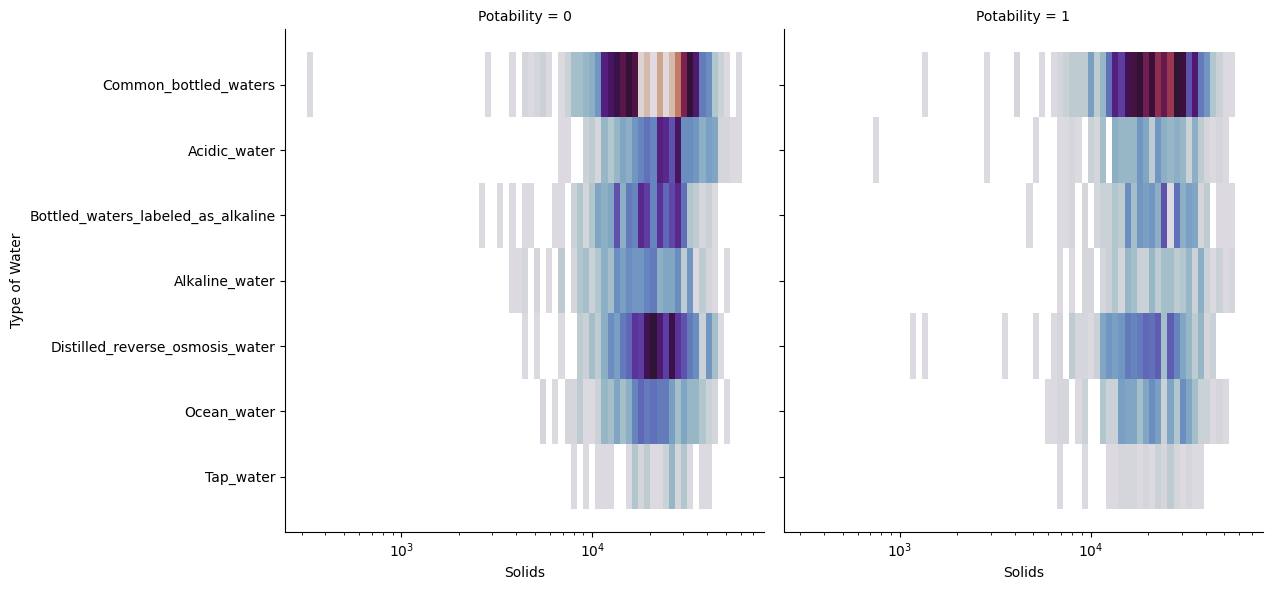

In [ ]:
sb.displot(data=df, x="Solids", y="Type of Water", col="Potability",cmap = "twilight",
    log_scale=(True, False), col_wrap=4, height=6, aspect=.95)

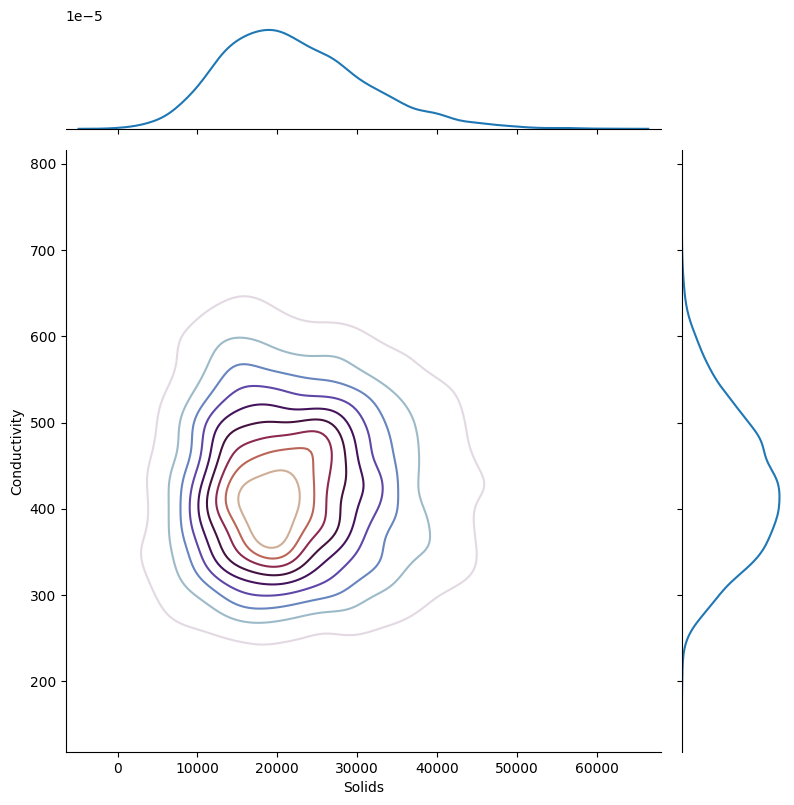

In [ ]:
g = sb.jointplot(x="Solids", y="Conductivity", data=df, cmap = "twilight",
                 kind="kde",palette =colors, height =8, aspect=0.95)

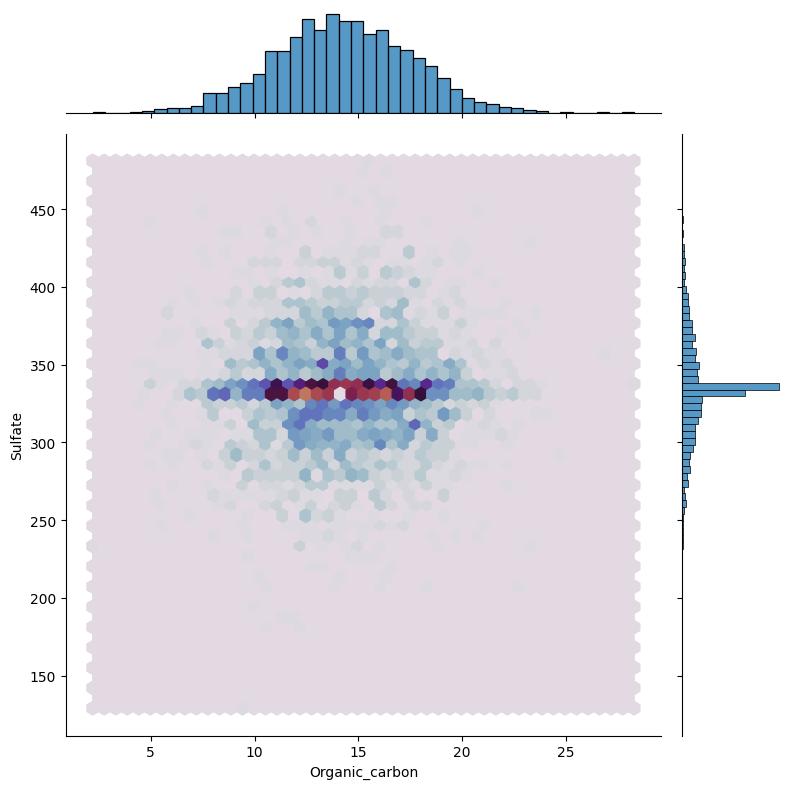

In [ ]:
g = sb.jointplot(x="Organic_carbon", y="Sulfate", data=df,
                  kind="hex",cmap ="twilight", height =8)

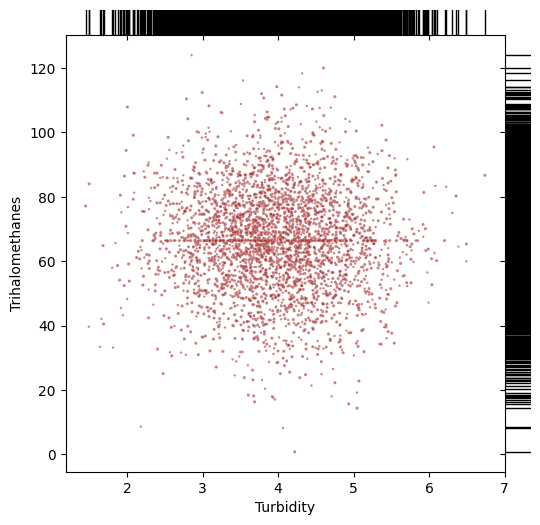

In [ ]:
g = sb.JointGrid(data=df, x="Turbidity", y="Trihalomethanes", space=0, ratio=17)
g.plot_joint(sb.scatterplot, size=df["Potability"], sizes=(3, 5),
             color="brown", alpha=.6, legend=False)
g.plot_marginals(sb.rugplot, height=15, alpha=1,color="Black")

In [ ]:
data = pd.get_dummies(df, columns = ['Type of Water', 'Type of Hardness'])
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.1  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.7  129.422921  18630.057858     6.635246  334.564290    592.885359   
2  8.1  224.236259  19909.541732     9.275884  334.564290    418.606213   
3  8.3  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.1  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  ...  \
0       10.379783        86.990970   2.963135           0  ...   
1       15.180013        56.329076   4.500656           0  ...   
2       16.868637        66.420093   3.055934           0  ...   
3       18.436524       100.341674   4.628771           0  ...   
4       11.558279        31.997993   4.075075           0  ...   

   Type of Water_Alkaline_water  \
0                         False   
1                         False   
2                         False   
3                         False   
4                          True   

   Type of Water_Bottled_waters_labeled_as_alkaline  \
0                                             False   
1                                             False   
2                                              True   
3                                              True   
4                                             False   

   Type of Water_Common_bottled_waters  \
0                                 True   
1                                False   
2                                False   
3                                False   
4                                False   

   Type of Water_Distilled_reverse_osmosis_water  Type of Water_Ocean_water  \
0                                          False                      False   
1                                          False                      False   
2                                          False                      False   
3                                          False                      False   
4                                          False                      False   

   Type of Water_Tap_water  Type of Hardness_Hard  \
0                    False                  False   
1                    False                   True   
2                    False                  False   
3                    False                  False   
4                    False                  False   

   Type of Hardness_Moderately_hard  Type of Hardness_Slightly_hard  \
0                             False                           False   
1                             False                           False   
2                             False                           False   
3                             False                           False   
4                             False                           False   

   Type of Hardness_Very_Hard  
0                        True  
1                       False  
2                        True  
3                        True  
4                        True  

[5 rows x 21 columns]

In [ ]:
X = data.drop(['Potability'], axis = 1)
Y = data['Potability']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.75, random_state=33)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

64.22

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

73.63

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

79.0

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

63.86

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

Model   Score
3            Random Forest  100.00
5            Decision Tree  100.00
1                      KNN   79.00
0  Support Vector Machines   73.63
2      Logistic Regression   64.22
4              Naive Bayes   63.86